
(vis-intro)=
# Intro to Data Visualisation


## Introduction

Here you'll see how to make plots that present data in an engaging and informative way.

There are a plethora of options (and packages) for data visualisation using code. First, though a note about the different *philosophies* of data visualisation. There are broadly two categories of approach to using code to create data visualisations: *imperative*, where you build what you want, and *declarative*, where you say what you want. Choosing which to use involves a trade-off: imperative libraries offer you flexibility but at the cost of some verbosity; declarative libraries offer you a quick way to plot your data, but only if it's in the right format to begin with, and customisation may be more difficult.

There are also different purposes of data visualisation. It can be useful to bear in mind the three broad categories of visualisation that are out there:

- exploratory

- scientific

- narrative

Python excels at exploratory and scientific visualisation. The tools for narrative visualisation are not as good as they could be for making common chart types efficiently, but the endless customisability of one particular Python package (**matplotlib**) means you can always get the effect you need (with some work).

### Exploratory Visualisation

The first of the three kinds of vis, *exploratory visualisation*, is the kind that you do when you're looking and data and trying to understand it. Just plotting the data is a really good strategy for getting a feel for any issues there might be. This is perhaps most famously demonstrated by *Anscombe's quartet*: four different datasets with the same mean, standard deviation, and correlation but *very* different data distributions.

(First let's import the packages we'll need:)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(10)
# Set max rows displayed for readability
pd.set_option("display.max_rows", 6)
# Plot settings
plt.style.use(
    "https://github.com/aeturrell/coding-for-economists/raw/main/plot_style.txt"
)

*Anscombe's quartet*:

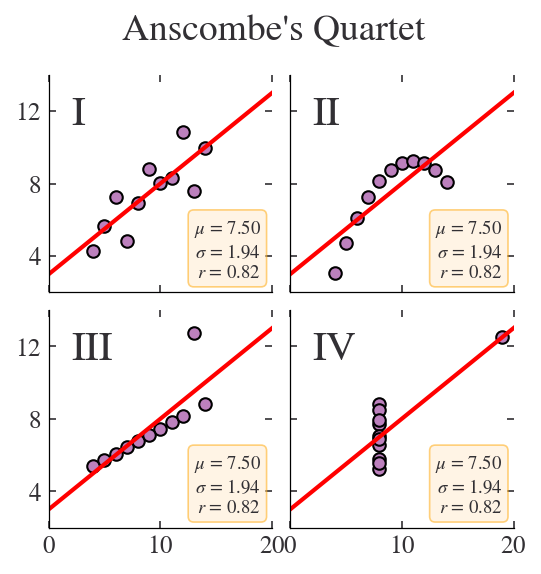

In [2]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

datasets = {"I": (x, y1), "II": (x, y2), "III": (x, y3), "IV": (x4, y4)}

fig, axs = plt.subplots(
    2,
    2,
    sharex=True,
    sharey=True,
    figsize=(4, 4),
    gridspec_kw={"wspace": 0.08, "hspace": 0.08},
)
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)) in zip(axs.flat, datasets.items()):
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va="top")
    ax.tick_params(direction="in", top=True, right=True)
    ax.plot(x, y, "o")

    # linear regression
    p1, p0 = np.polyfit(x, y, deg=1)  # slope, intercept
    ax.axline(xy1=(0, p0), slope=p1, color="r", lw=2)

    # add text box for the statistics
    stats = (
        f"$\\mu$ = {np.mean(y):.2f}\n"
        f"$\\sigma$ = {np.std(y):.2f}\n"
        f"$r$ = {np.corrcoef(x, y)[0][1]:.2f}"
    )
    bbox = dict(boxstyle="round", fc="blanchedalmond", ec="orange", alpha=0.5)
    ax.text(
        0.95,
        0.07,
        stats,
        fontsize=9,
        bbox=bbox,
        transform=ax.transAxes,
        horizontalalignment="right",
    )

plt.suptitle("Anscombe's Quartet")
plt.show()

Exploratory visualisation is usually quick and dirty, and flexible too. Some exploratory data viz can be automated, and some of the packages we saw in the chapter on {ref}`exploratory-data-analysis` can do this. For an EDA package that's explicitly built with visalisation in mind, check out [SweetViz](https://github.com/fbdesignpro/sweetviz). Beyond you and perhaps your co-authors/collaborators, not many other people should be seeing your exploratory visualisation.

### Scientific Visualisation

The second kind, scientific visualisation, is the prime cut of your exploratory visualisation. It's the kind of plot you might include in a more technical paper, the picture that says a thousand words. I often think of the first image of a black hole {cite}`akiyama2019first` as a prime example of this. You can get away with having a high density of information in a scientific plot and, in short format journals, you may need to. The journal *Physical Review Letters*, which has an 8 page limit, has a classic of this genre in more or less every issue. Ensuring that important values can be accurately read from the plot is especially important in these kinds of charts. But they can also be the kind of plot that presents the killer results in a study; they might not be exciting to people who don't look at charts for a living, but they might be exciting and, just as importantly, understandable by your peers.

### Narrative Visualisation

The third and final kind is narrative visualisation. This is the one that requires the most thought in the step where you go from the first view to the end product. It's a visualisation that doesn't just show a picture, but gives an insight. These are the kind of visualisations that you might see in the *Financial Times*, *The Economist*, or on the BBC News website. They come with aids that help the viewer focus on the aspects that the creator wanted them to (you can think of these aids or focuses as doing for visualisation what bold font does for text). They're well worth using in your work, especially if you're trying to communicate a particular narrative, and especially if the people you're communicating with don't have deep knowledge of the topic. You might use them in a paper that you hope will have a wide readership, in a blog post summarising your work, or in a report intended for a policymaker.

You can find more information on the topic in the {ref}`vis-narrative` chapter.

## Quick guide to data visualisation

Addressing data visualisation, a huge topic in itself, is definitely out of scope for this book! But it's worth discussing a few general pointers at the outset that will serve you very well if you follow them.

A picture may tell a 1000 words, but you've got to be a bit careful about what those words are. The first question you should ask yourself when it comes to data visualisation is 'what does this plot tell the viewer?', ie what do you want people to take away from your chart. That nugget of information should be as apparent as possible from the plot. Then you want to ensure that people *do* take away what you meant them to; the viewer should be left in little doubt about what you are saying.

Another factor to bear in mind is that papers typically don't have more than, say, ten plots in them--and frequently fewer than that. So each one must count and advance the narrative of your work somehow. (Easier to say, hard to do in practice.) As an example, if you have data that are normally distributed, and you want to show this, it's probably not worth showing it on a plot. But if you had two distributions whose differences were important for the overall story you were telling, that might be something to highlight.

Then there are more practical matters: is this plot better done as a scatter plot or a line? Should I stack my bar chart or split out the contributions? Those questions address the *type* of plot you're creating. For example, if you have observations that are independent from one another, with no auto-correlation along the x-axis, a scatter plot is more appropriate than a line chart. However, for time series, which tend to exhibit a high degree of auto-correlation, a line chart could be just the thing. As well as the overall type, for example scatter plot, you can think about adding more information through the use of colours, shapes, sizes, and so on. But my advice is always to be sparing with extra dimensions of information as it very quickly becomes difficult to read. In most cases, an x-axis, a y-axis, and, usually, one other dimension (eg colour) will be the best option.

Once you've decided on the *type* of chart, you can then think about smaller details. Unfortunately, lack of labels is endemic in economics ("percent of what!?", I cry at least three times a day). Always make what you're plotting clear and, if it has units, express them (eg "Salary (2015 USD)"). Think carefully about the tick labels to use too; you'll want something quite different for linear versus log plots. Titles can be helpful too, if the axes labels and the chart by themselves don't tell the whole story. 

Then, if there are very specific features you'd like to draw attention to, you can achieve this with text labels (as used liberally in the data visualisations you'll see in newspapers like the *Financial Times*), greying out all but the most interesting data point, etc.; anything that singles out one part of the chart as the interesting one. A common trick is to plot the less important features with greater transparency and the important line/point/bar with solid colour. These all have the effect of drawing the eye straight to where it should spend the most time.

This is just the briefest of brief overviews of what you should bear in mind for good visualisation; I highly recommend the short and delightful [Fundamentals of Data visualisation](https://clauswilke.com/dataviz/) if you'd like to know more.

In terms of further resources to help you choose the right plot for the occassion, you can't go too far wrong than the [*Financial Times* Visual Vocabulary of charts](https://github.com/ft-interactive/chart-doctor/tree/master/visual-vocabulary). And, please, please use [vector graphics](https://clauswilke.com/dataviz/image-file-formats.html) whenever you can!

### Colour

This section has benefitted from this [blog piece](https://blog.datawrapper.de/which-color-scale-to-use-in-data-vis/) on visualisation and colour, and you can find more information there.

Colours often make a chart come alive, but, when encoding differences with colour, think carefully about what would serve your audience and message best. It's best not to use colour randomly, but to choose colours that either add information to the chart or get out of the way of the message. Often, you'll want to draw your colours from a 'colour palette', a collection of different colours that work together to create a particular effect. The best colour palettes take into account that colour blindness is a problem for many people, and they remain informative even when converted to greyscale.

One of the most popular Python visualisation libraries, **matplotlib**, comes with a wide range of colour palettes available [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) and you can find another good package for colour palettes [here](https://colorcet.holoviz.org/).

#### Categorical Data

For (unordered) categorical data, visually distinct colour palettes (also known as qualitative palettes) are better. The basic rule is that you should use distinct hues when your values don’t have an inherent order or range. Note that this does not include Likert scales (“strongly agree, agree, neutral, disagree, strongly disagree”), because even though there are distinct categories, there is an order to the possible responses.

Here are some examples of the qualitative hues available in the visualisation package **matplotlib**.

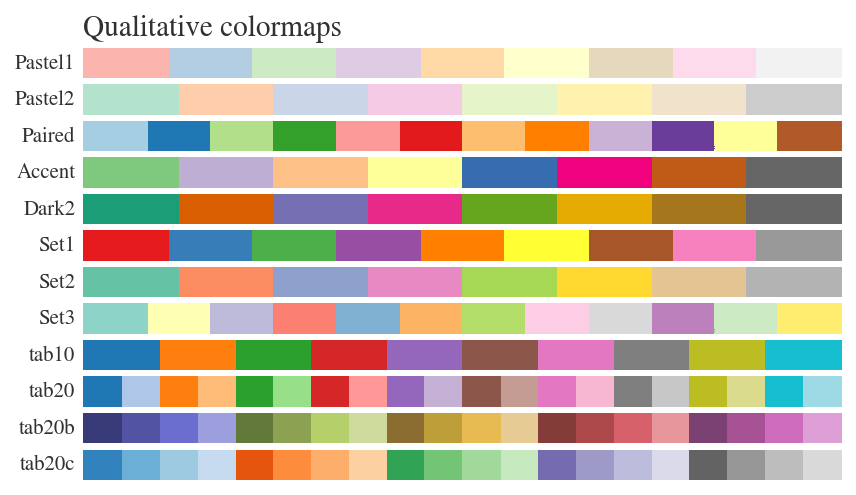

In [3]:
# remove-input
cmaps = [
    (
        "Perceptually Uniform Sequential",
        ["viridis", "plasma", "inferno", "magma", "cividis"],
    ),
    (
        "Sequential",
        [
            "Greys",
            "Purples",
            "Blues",
            "Greens",
            "Oranges",
            "Reds",
            "YlOrBr",
            "YlOrRd",
            "OrRd",
            "PuRd",
            "RdPu",
            "BuPu",
            "GnBu",
            "PuBu",
            "YlGnBu",
            "PuBuGn",
            "BuGn",
            "YlGn",
        ],
    ),
    (
        "Sequential (2)",
        [
            "binary",
            "gist_yarg",
            "gist_gray",
            "gray",
            "bone",
            "pink",
            "spring",
            "summer",
            "autumn",
            "winter",
            "cool",
            "Wistia",
            "hot",
            "afmhot",
            "gist_heat",
            "copper",
        ],
    ),
    (
        "Diverging",
        [
            "PiYG",
            "PRGn",
            "BrBG",
            "PuOr",
            "RdGy",
            "RdBu",
            "RdYlBu",
            "RdYlGn",
            "Spectral",
            "coolwarm",
            "bwr",
            "seismic",
        ],
    ),
    ("Cyclic", ["twilight", "twilight_shifted", "hsv"]),
    (
        "Qualitative",
        [
            "Pastel1",
            "Pastel2",
            "Paired",
            "Accent",
            "Dark2",
            "Set1",
            "Set2",
            "Set3",
            "tab10",
            "tab20",
            "tab20b",
            "tab20c",
        ],
    ),
    (
        "Miscellaneous",
        [
            "flag",
            "prism",
            "ocean",
            "gist_earth",
            "terrain",
            "gist_stern",
            "gnuplot",
            "gnuplot2",
            "CMRmap",
            "cubehelix",
            "brg",
            "gist_rainbow",
            "rainbow",
            "jet",
            "turbo",
            "nipy_spectral",
            "gist_ncar",
        ],
    ),
]


gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh, left=0.2, right=0.99)

    axs[0].set_title(cmap_category + " colormaps", fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect="auto", cmap=plt.get_cmap(name))
        ax.text(
            -0.01,
            0.5,
            name,
            va="center",
            ha="right",
            fontsize=10,
            transform=ax.transAxes,
        )

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps[5:6]:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()

#### Continuous Colour Scales

Continuously varying data need a sequential colour scale, but there are two types: *sequential* and *diverging*

For data that vary from low to high, you can use a sequential colourmap. Best practice is to use a sequential colourmap that is perceptually uniform. The authors of the Python package **matplotlib** [developed](https://bids.github.io/colormap/) several perceptually uniform colourmaps that are now widely used, not just in Python, but in other languages and contexts too {cite:ps}`nunez2018optimizing`. These are the ones built-in to **matplotlib**:

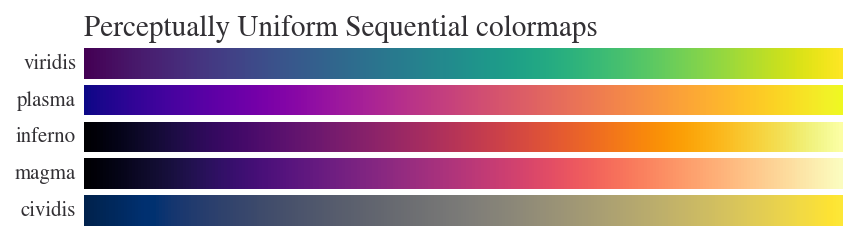

In [4]:
# remove input
for cmap_category, cmap_list in cmaps[:1]:
    plot_color_gradients(cmap_category, cmap_list)

Do not use the JET colourmap: it is very much not perceptually uniform. If you do want a rainbow-like sequential and perceptually uniform colourmap, then turbo, [developed by Google](https://ai.googleblog.com/2019/08/turbo-improved-rainbow-colormap-for.html), is as good a choice as you're going to find. You can find turbo within matplotlib.

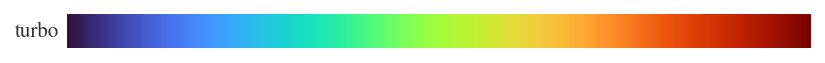

In [5]:
# remove-input
def show_one_colourmap(cmap):
    fig, ax = plt.subplots(figsize=(6.4, 0.3))
    ax.text(
        -0.01, 0.5, cmap, va="center", ha="right", fontsize=10, transform=ax.transAxes
    )
    ax.imshow(gradient, aspect="auto", cmap=plt.get_cmap(cmap))
    ax.set_axis_off()
    plt.show()


show_one_colourmap("turbo")

Sometimes a *diverging* colourmap will be more appropriate for your data. These are also called bipolar or double-ended color scales and, instead of just going from low to high, they tend to have a default middle value (often brighter) with values either side that are darker in different hues. Diverging color scales are often used to visualise negative and positive differences relative to zero, election results, or Likert scales (for example, “strongly agree, agree, neutral, disagree, strongly disagree”).

These are the built-in ones in **matplotlib**:


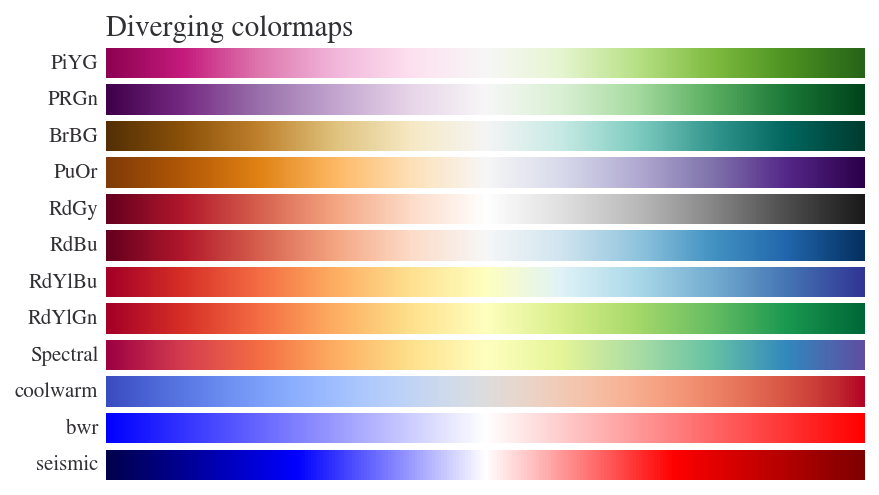

In [6]:
# remove input
for cmap_category, cmap_list in cmaps[3:4]:
    plot_color_gradients(cmap_category, cmap_list)

So how do you choose between a diverging or sequential colour scale? Divering colour scales work better when i) there’s a meaningful middle point, ii) there are extremes that you want to emphasise, iii) when differences are more of the story than levels, and iv) when you don't mind that people will have to put in a bit of extra effort to understand the chart relative to the typically more intuitive sequential colour scale.

Finally, this book uses a colour-blind friendly qualitative scheme (you can find the list of colours in [this](https://github.com/aeturrell/coding-for-economists/blob/main/plot_style.txt) file).

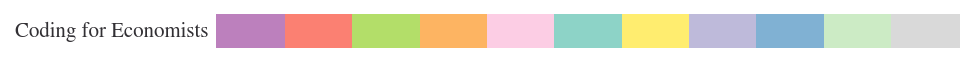

In [7]:
# remove input
from matplotlib.colors import LinearSegmentedColormap

colours = plt.rcParams["axes.prop_cycle"].by_key()["color"]
cmap = LinearSegmentedColormap.from_list(
    "coding for economists: qualitative colourmap", colours, N=len(colours)
)

fig, ax = plt.subplots(figsize=(6.4, 0.3))
ax.imshow(gradient, aspect="auto", cmap=plt.get_cmap(cmap))
ax.text(
    -0.01,
    0.5,
    "Coding for Economists",
    va="center",
    ha="right",
    fontsize=10,
    transform=ax.transAxes,
)
ax.set_axis_off()
plt.show()

## Libraries for data visualisation

In the rest of this chapter, we'll take a look at making visualisations with several of these libraries. But first, let's introduce them.

The most important and widely used data visualisation library in Python is [**matplotlib**](https://matplotlib.org/). It was used to make the first image of a black hole {cite}`akiyama2019first` and to image the first empirical evidence of gravitational waves {cite}`abbott2016observation`. **matplotlib** is an imperative visualisation library: you specify each part of what you want individually to build up an entire picture. It's perhaps the easiest to get started with and the most difficult to master. As well as making plots, it can also be used to make diagrams, animations, and 3D visualisations (which you should use sparingly, if at all).

[**seaborn**](https://seaborn.pydata.org/index.html) is a popular declarative library that builds on **maplotlib** and works especially well with data that are in a *tidy* format (one row per observation, one column per variable). I tend to use a mixture of **seaborn** and **matplotlib** in my work.

[**plotnine**](https://plotnine.readthedocs.io/en/latest/) is another declarative plotting library but, rather than having lots of different functions (eg 'boxplot', 'violinplot', 'scatterplot') as **seaborn** does, it adopts a *grammar of graphics* approach. What this means is that *all* visualisations begin with the same command, `ggplot`, and are combinations of layers that address different aspects of a plot, for example points or lines, scale, labels, and so on. It'll be clearer when we come to an example.

[**altair**](https://altair-viz.github.io/) is yet another declarative plotting library for Python! It's most suited to interactive graphics on the web, and produces really beautiful charts. Under the hood, it calls a javascript library named **Vega-Lite** that's the sort of thing newspaper data visualisation units might use to make their infographics.

**pandas** also has built-in plotting functions that you will have seen in the data analysis part of this book. They are of the form `df.plot.*` where `*` could be, for example, `scatter`. These are convenience functions for making a quick plot of your data and they actually use **matplotlib**; we won't see much of these here but you can find them in the data analysis chapter.

We're going to start this chapter by finding out a little bit more about each of these data visualisation libraries before looking at some examples of how to make specific plots with all the main libraries. We'll end by looking at some more interesting and advanced plots.

### Matplotlib

For a more in-depth introduction to matplotlib, head over to [this tutorial](https://github.com/rougier/matplotlib-tutorial).

Each of these libraries has their own default theme for how it shows plots. Personally, I'm not much of a fan of the **matplotlib** default so the first thing I do is to change it to something more aesthetically pleasing and that uses the kind of fonts you'll see in a paper compiled with latex.

You'll see we imported `matplotlib.pyplot as plt` above; this is the main part of **matplotlib** that we'll use in practice.

There are actually two ways to use **matplotlib**: the 'pyplot API' and the 'object-oriented API'. The pyplot API (application programming interface) gives an experience that's much closer to Matlab and can be useful to make a quick chart. It's very simple to use, for example:

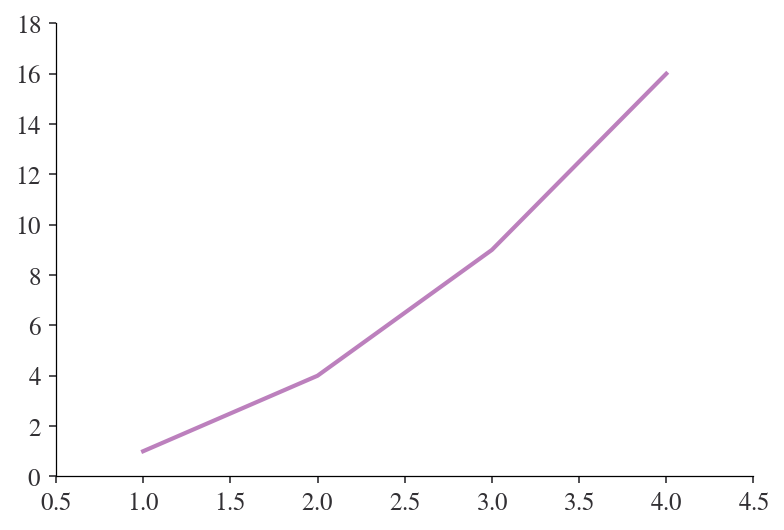

In [8]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

```{admonition} Tip
:class: tip
**Matplotlib** returns an object when used, eg `[<matplotlib.lines.Line2D...` above. To suppress this, end the command with a semi-colon, `;`.
```

However, the pyplot API is generally less-flexible and less-useful than the object-oriented API, and for the rest of this chapter we'll be using the object-oriented API.

The object-oriented API is most often used by creating two objects: the figure and the axes. You should think of the figure object, `fig`, as the canvas on which you can put any number of charts. Each ax (short for 'axis') object is one chart within a figure. Of course, most of the time you're likely only to have one axis per figure, but in the cases when you don't it's a really useful setup. The plotting of elements such as lines, points, bars, and so, are controlled by the `ax` objects while the overall settings are controlled by `fig`.

Let's see an example of a line chart using this object-oriented approach.

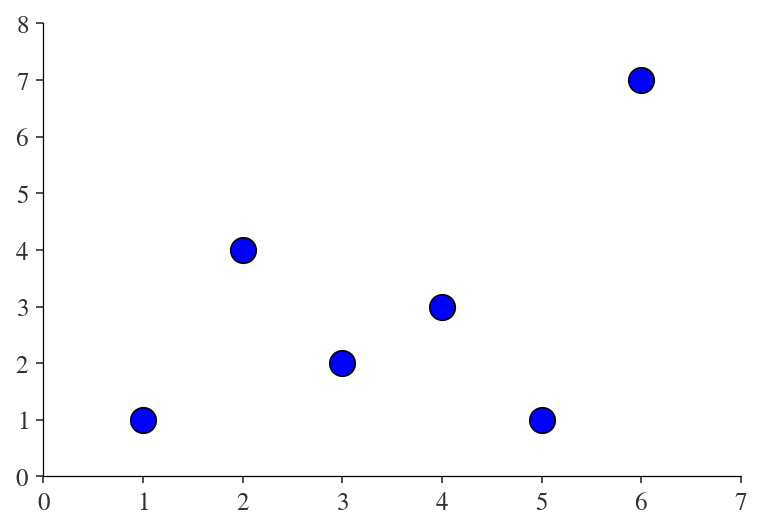

In [9]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.scatter([1, 2, 3, 4, 5, 6], [1, 4, 2, 3, 1, 7], s=150, c="b")
# Plot some data on the axes.

In the above example, we used `ax.scatter` to get a scatter plot, `s=150` to set the area of the points, and `c='b'` to set the color. Many of these features will accept an array instead of a single value and will map them into the plot in the way you'd expect, for instance:

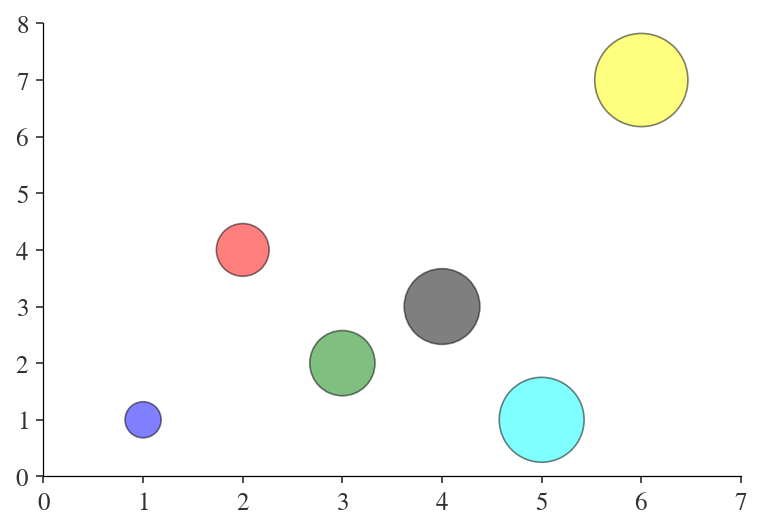

In [10]:
fig, ax = plt.subplots()
ax.scatter(
    [1, 2, 3, 4, 5, 6],
    [1, 4, 2, 3, 1, 7],
    s=np.linspace(300, 2000, 6),
    c=["b", "r", "g", "k", "cyan", "yellow"],
    edgecolors="k",
    alpha=0.5,
);

Here we asked for a different colour for each point, an area that's increasing linearly, partly transparent points (default is `alpha=1`, which is a solid colour), and a black edge colour.

You can probably begin to see how everything is going to be customisable. We've only seen aspects of the plot that are customisable through the `scatter` keyword so far though; let's now see an example that's a bit more real (and useful!) in which we'll want to add labels, a title, and more. We'll use the Midwest demographics dataset.

In [11]:
df = pd.read_csv(
    "https://vincentarelbundock.github.io/Rdatasets/csv/ggplot2/midwest.csv",
    index_col="PID",
).drop("Unnamed: 0", axis=1)
df.head()

,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,popother,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
PID,,,,,,,,,,,,,,,,,,,,,
561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,124,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,9,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,34,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,1139,...,17.278954,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,6,...,14.475999,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR


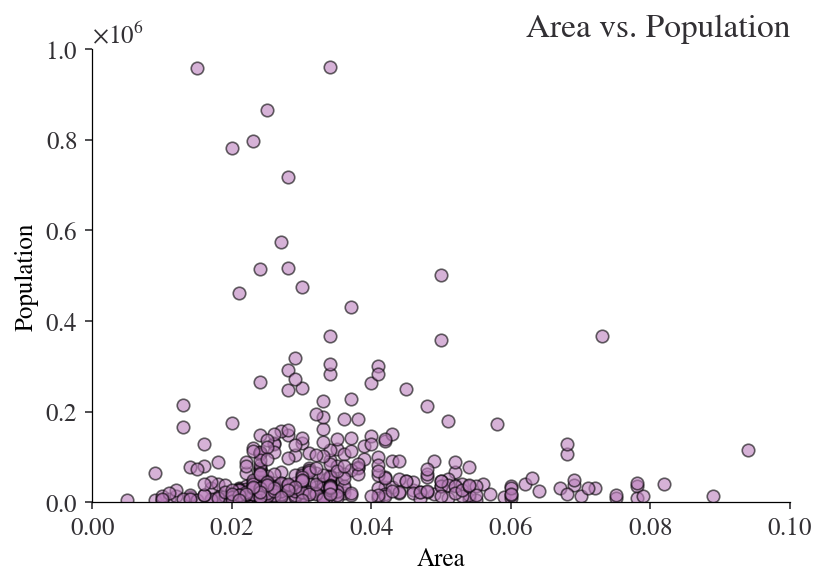

In [12]:
fig, ax = plt.subplots()
ax.scatter(df["area"], df["poptotal"], edgecolors="k", alpha=0.6)
ax.set_xlim(0, 0.1)
ax.set_ylim(0, 1e6)
ax.set_xlabel("Area")
ax.set_ylabel("Population")
ax.set_title("Area vs. Population", loc="right");

Perhaps you can see from this already that **matplotlib** offers a ton of customisation features *and* that it can be quite verbose.

Let's see another couple of customisations that are really useful: formatting axes. The y-axis has already been formatted because we used a specific style file at the top of the page (the line beginning `plt.style.use`) but, on the x-axis, we'll add a percentage suffix on the numbers plus some minor tick marks.

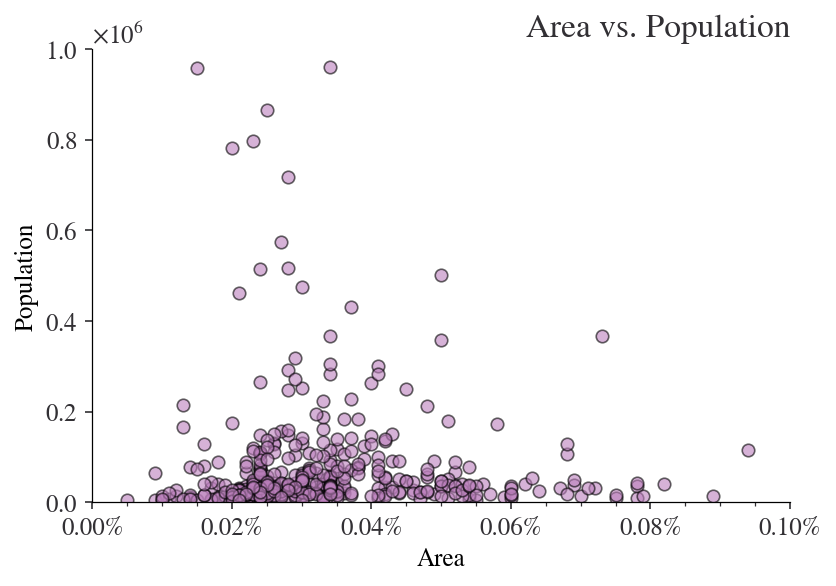

In [13]:
from matplotlib.ticker import AutoMinorLocator

fig, ax = plt.subplots()
ax.scatter(df["area"], df["poptotal"], edgecolors="k", alpha=0.6)
ax.set_xlim(0, 0.1)
ax.set_ylim(0, 1e6)
ax.set_xlabel("Area")
ax.set_ylabel("Population")
ax.set_title("Area vs. Population", loc="right")
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_major_formatter("{x:.2f}%")
ax.ticklabel_format(style="sci", scilimits=(-2, 2), axis="y", useMathText=True);

The `AutoMinorLocator(4)` inserts 4 minor tick marks between each major tick mark. The major formatter is `'{x:.2f}%'`, which says print 2 decimal places followed by a % sign. Finally, the `ax.ticklabel_format` option changes the computer science notation to use latex to print a prettier form of the one million signifier.

Rather than go through all of the many, many options for customisation, the figure below (from the Matplotlib documentation) gives an overview of the options:

![Anatomy of a matplotlib figure](https://matplotlib.org/_images/anatomy.png)

Okay a quick overview of what the most important plot elements are:

- Figure, or 'fig': the figure keeps track of all the child Axes that are on it and a smattering of 'special' artists (titles, figure legends, etc). A figure can contain any number of Axes, but will typically have at least one.
- Axes, or 'ax': this is the plot, the region of the image that traces out the data. A given Figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (Axes and Axis are different things!) that record the data limits (you can override these via the `axes.Axes.set_xlim()` and `axes.Axes.set_ylim()` methods). Each Axes object has a title (set via `set_title()`), an x-label (set via `set_xlabel()`), and a y-label set via `set_ylabel()`). When you add, say, a line chart to an Axes object it appears as a Line2D object associated that that axis and it is created by calling a method on an Axes object.
- Axis: these are the number-line objects that control the limits of what the viewer can see. They also provide the means to access the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of Locator and Formatter gives very fine control over the tick locations and labels.

You can find a detailed blog post on the ins and outs [here](https://dev.to/skotaro/artist-in-matplotlib---something-i-wanted-to-know-before-spending-tremendous-hours-on-googling-how-tos--31oo). The object-oriented structure of **matplotlib** plots can be confusing at first, but, as we'll see, it pretty much fades into the background when you're making plots.

While **matplotlib** is super-customisable, sometimes achieving what you want directly can be a bit verbose. Let's say we want to now differentiate these points with colour according to which state they belong to and add a legend that says which states have which colour. The easiest way to do this is by creating a for loop.

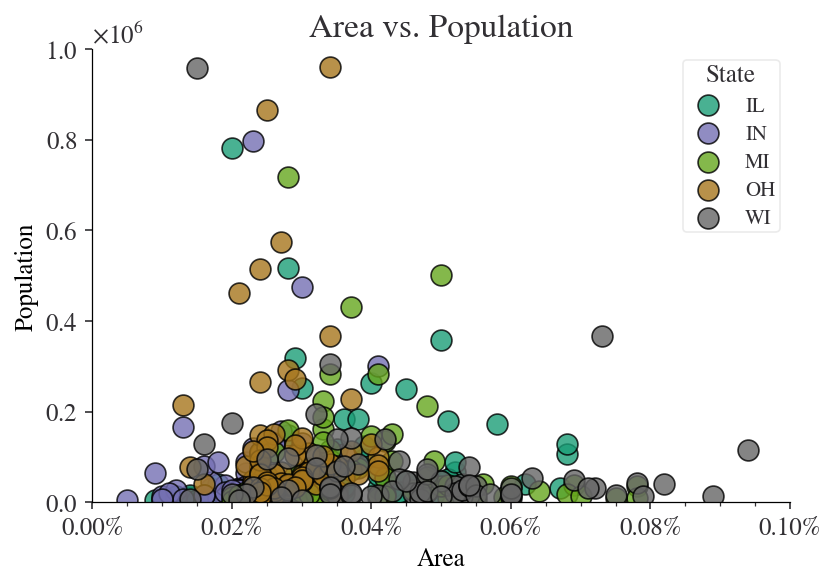

In [14]:
colours = plt.get_cmap("Dark2")(np.linspace(0, 1, len(df["state"].unique())))

fig, ax = plt.subplots()
for i, state in enumerate(df["state"].unique()):
    xf = df.loc[df["state"] == state]
    ax.scatter(
        xf["area"],
        xf["poptotal"],
        color=colours[i],
        label=state,
        s=100,
        edgecolor="k",
        alpha=0.8,
    )
ax.set_xlim(0, 0.1)
ax.set_ylim(0, 1e6)
ax.set_xlabel("Area")
ax.set_ylabel("Population")
ax.set_title("Area vs. Population", loc="center")
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_major_formatter("{x:.2f}%")
ax.ticklabel_format(style="sci", scilimits=(-2, 2), axis="y", useMathText=True)
ax.legend(title="State", loc="upper right");

Okay, so we managed to get what we wanted. We used a colormap to get 5 qualitatively different colours; there are also sequential colormaps for continuous (as opposed to discrete) variables. You can find out more about the colormaps available in base matplotlib [here](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html). We also subsetted the dataframe and looped over it by state. Matplotlib doesn't always work so well with tidy data. As you saw in this example, we had to loop over the different states. Some of its defaults are a little more friendly when using data that is unstacked, eg with one state per column.

However, this was quite verbose; when we come to **seaborn**, we'll see a much easier way of doing this. 

For now, let's see a couple of other plot types that are useful, beginning with contour plots:

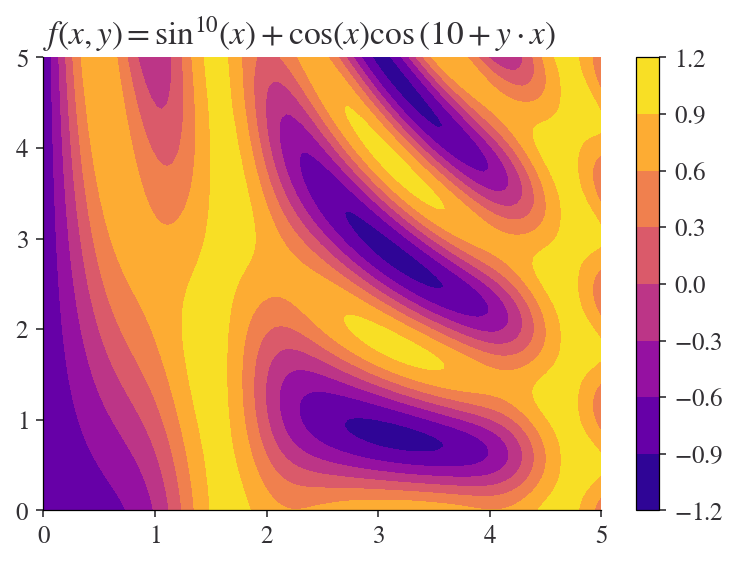

In [15]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)


x = np.linspace(0, 5, 100)
y = np.linspace(0, 5, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots()
cf = ax.contourf(X, Y, Z, cmap="plasma")
ax.set_title(r"$f(x,y) = \sin^{10}(x) + \cos(x)\cos\left(10 + y\cdot x\right)$")
cbar = fig.colorbar(cf)

This demonstrates creating a heatmap (or contour plot) with a colour bar legend and a title that's rendered with latex. The heatmap uses a perceptually uniform distribution that makes equal changes look equal; **matplotlib** has a few of these. If you need more colours, check out the packages [**colorcet**](https://colorcet.holoviz.org/) and [**palettable**](https://jiffyclub.github.io/palettable/).

You can do some really quite amazing things using **matplotlib**'s build what you want philosophy. For instance, you can [build a timeline](https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py), make [charts with polar axes](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/polar_bar.html#sphx-glr-gallery-pie-and-polar-charts-polar-bar-py), and create [XKCD style plots](https://matplotlib.org/3.1.1/gallery/showcase/xkcd.html#sphx-glr-gallery-showcase-xkcd-py).

One basic bit of functionality that you might need is to put more than one type of information on a single plot. Using the object-oriented API, this is as simple as calling another method on an `ax` that you've already created. In the example below, we'll call `ax.hist` followed by `ax.plot` to get a the theoretical curve for a normal distribution (aka Gaussian) overlaid on a kernel density estimate based on many draws from the relevant distribution using `numpy`.

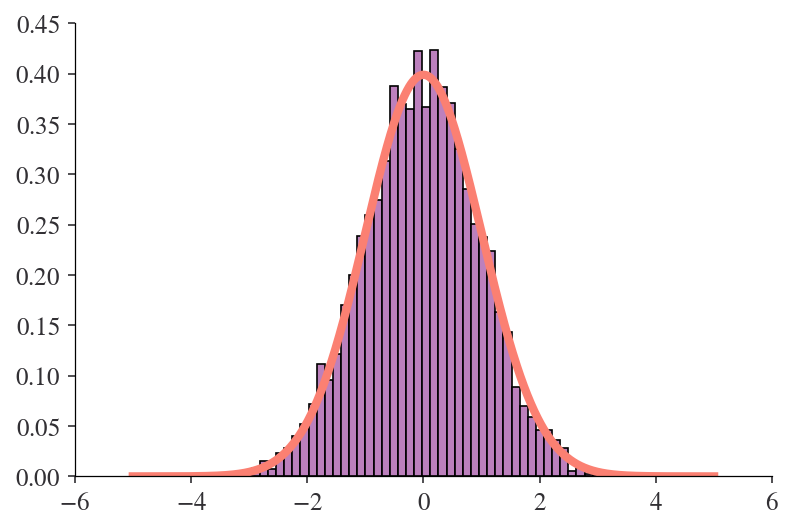

In [16]:
rand_draws = np.random.randn(5000)
grid_x = np.linspace(-5, 5, 1000)

fig, ax = plt.subplots()
ax.hist(rand_draws, bins=50, density=True)
ax.plot(grid_x, 1 / np.sqrt(2 * np.pi) * np.exp(-(grid_x ** 2) / 2), linewidth=4);

Another important class of plots that we should look at are line charts, especially time series. Let's grab the real GDP time series for the UK and US and look at the year-on-year quarterly growth rates (the first few entries will be `NaN` because we switched to growth space).

In [17]:
import pandas_datareader.data as web

ts_start_date = pd.to_datetime("1999-01-01")

df = pd.concat(
    [
        web.DataReader("ticker=RGDP" + x, "econdb", start=ts_start_date)
        for x in ["US", "UK"]
    ],
    axis=1,
)
df.columns = ["US", "UK"]
df.index.name = "Date"
df = 100 * df.pct_change(4)
df.head()

,US,UK
Date,,
1999-01-01,NaN,NaN
1999-04-01,NaN,NaN
1999-07-01,NaN,NaN
1999-10-01,NaN,NaN
2000-01-01,4.225956,4.315426


Okay, now the quick way to plot this would be to simply call `df.plot()`. That works fine and doesn't look too bad: it recognises that it's dealing with a datetime and plots sensible tick labels on the x-axis, and it produces a legend for each of the two time series. But let's say we want to make that plot quickly *and* do some fine-tuning with **matplotlib**: how can we? The answer is to create a `fig` and an `ax` and then to ask our dataframe to use the `ax` we already created to plot the data. We can then carry on using the `ax` object in any way we like.

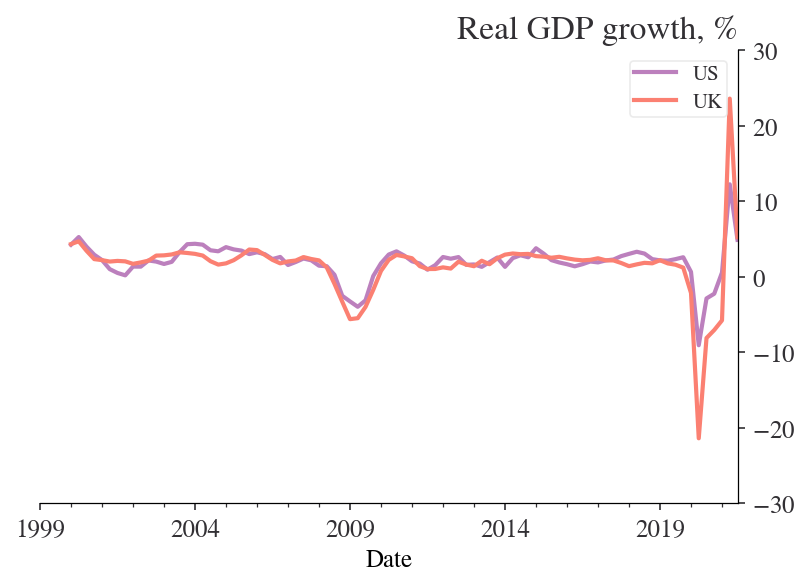

In [18]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Real GDP growth, %", loc="right")
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.tick_right()
# Put tick marks and tick labels on right-hand side

We could also have created this chart by looping through the different countries just as we looped through the difference states in the previous example.

Let's also see what happens when we use different limits:

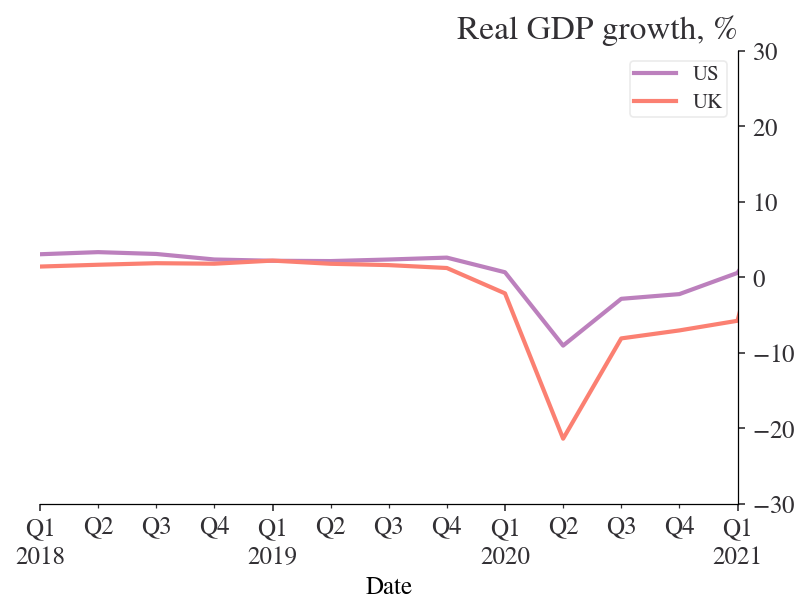

In [19]:
fig, ax = plt.subplots()
df.plot(ax=ax)
ax.set_title("Real GDP growth, %", loc="right")
ax.spines["right"].set_visible(True)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.yaxis.tick_right()  # Put tick marks and tick labels on right-hand side
ax.set_xlim(pd.to_datetime("2018-01-01"), pd.to_datetime("2021-01-01"));

As you can see, the plot dynamically responded to the shorter time period by putting more details in, here of quarters. You can specify exactly what you want with the tick label formatters that cater to datetimes, but the defaults are pretty well-behaved.

Sometimes, you want to show different lines in different panels (or facets, as they are also known). You can do that with **matplotlib** too, though once again it's a build-your-own affair.

Let's put these two time series in their own facets to see how it works.

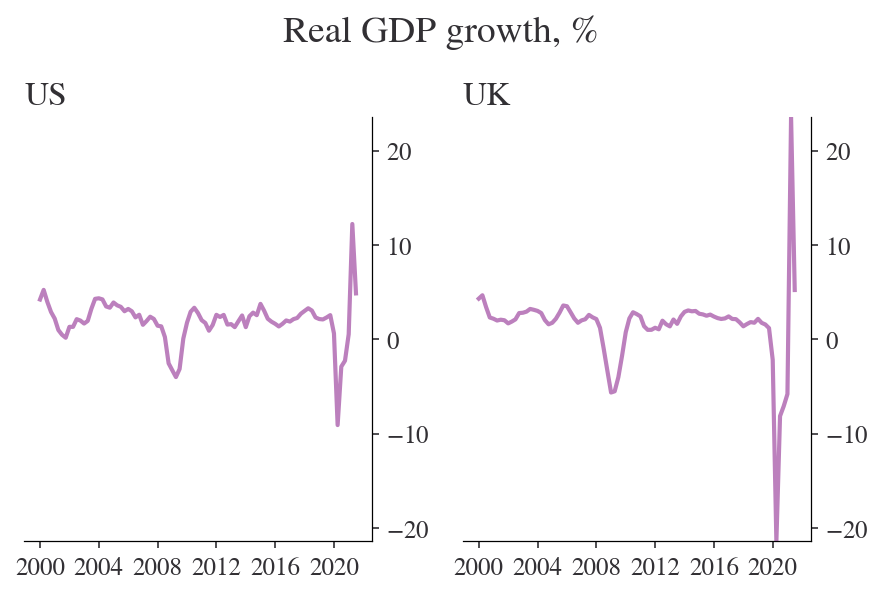

In [20]:
fig, axes = plt.subplots(1, 2)
for i, ax in enumerate(axes):
    ax.plot(df.index, df.iloc[:, i])
    ax.set_title(df.columns[i], loc="left")
    ax.yaxis.tick_right()
    ax.spines["right"].set_visible(True)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_ylim(df.min().min(), df.max().max())
fig.suptitle("Real GDP growth, %")
plt.tight_layout();

Quite a few things are happening here. The first is that we asked for more rows and columns from matplotlib using `plt.subplots(nrows, ncolumns)` and instead of returning a single `ax` it returned a list of axes (here of length 2). We then iterated over those axes using enumerate, which gives an integer `i` and an `ax` from the list, and plotted a column on each axis by subsetting the dataframe one column at a time using `df.iloc[:, i]`. Remember that the first position in `iloc` is for the index values (ie the rows), while the second is for the columns. Again, this was quite a lot of code to get a relatively simple chart done! And that's exactly why we're now going to take a look at the declarative library **seaborn** that wraps **matplotlib**.

### Seaborn

**seaborn** provides a high-level interface for quickly drawing standard charts. It is based on **matplotlib*, which is great because it means you can always tinker if you need to. And it plays very nicely with **pandas** dataframes too, so it can easily fit into your workflow.

Here's an overview of the API (application programming interface; basically the commands we can feed the library) for **seaborn**. (NB: this figure excludes the facet option, which combines multiple versions of the below plots.)

![seaborn api diagram](https://seaborn.pydata.org/_images/function_overview_8_0.png)

Let's see the chart we were just trying to make but rendered in **seaborn**. The first difference is that **seaborn** expects *tidy data*, a concept from the Data part of this book. So first we must transform our data into tidy format.



In [21]:
tidy_df = df.stack().reset_index()
tidy_df.columns = ["Date", "Country", "Real GDP growth, %"]
tidy_df.head()

,Date,Country,"Real GDP growth, %"
0,2000-01-01,US,4.225956
1,2000-01-01,UK,4.315426
2,2000-04-01,US,5.244683
3,2000-04-01,UK,4.675779
4,2000-07-01,US,3.974084


Okay now let's use seaborn to do the plotting. As with **matplotlib**, the way to get different charts in **seaborn** is a matter of knowing the API names. Here, we'll use `relplot`, which is for facets.

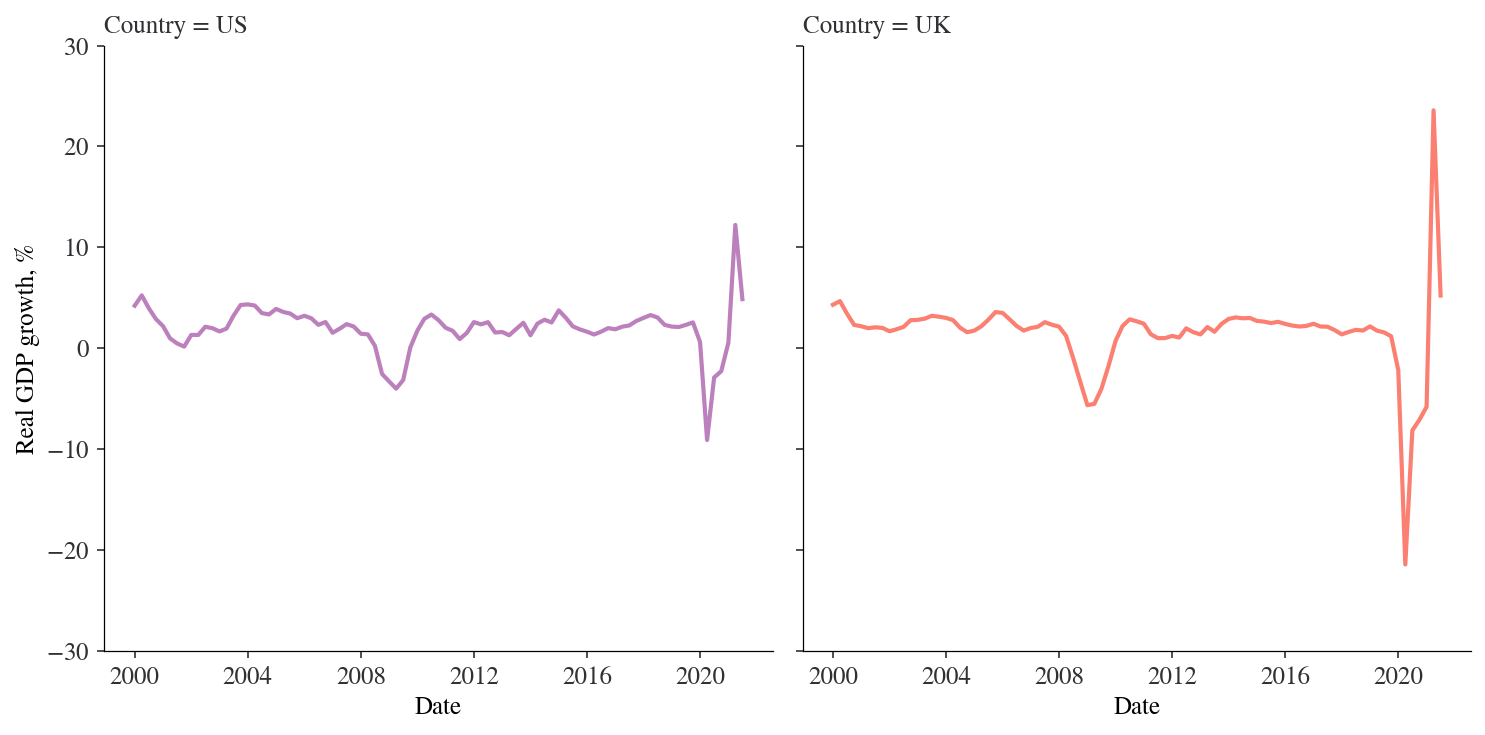

In [22]:
import seaborn as sns

sns.relplot(
    data=tidy_df,
    x="Date",
    y="Real GDP growth, %",
    hue="Country",
    col="Country",
    kind="line",
    legend=False,
);

In this case, we got a very similar plot with less effort--and what we do is more generalisable too. As long as we have data in a tidy format, we can specify the columns to seaborn and let it put them in different facets. And facets aren't the only difference it can provide either: you can specify the hue such that it depends on another categorical variable (rather than, as in this case, changing with each facet). Here's an example changing the hue to reflect an extra type of information, region:


In [23]:
# Download RGDP for Canada and France:
extra_df = pd.concat(
    [
        web.DataReader("ticker=RGDP" + x, "econdb", start=ts_start_date)
        for x in ["CA", "FR"]
    ],
    axis=1,
)
extra_df.columns = ["CA", "FR"]
extra_df.index.name = "Date"
extra_df = (100 * extra_df.pct_change(4)).stack().reset_index()
extra_df.columns = ["Date", "Country", "Real GDP growth, %"]
# Add the new data to the tidy dataframe
tidy_df = pd.concat([tidy_df, extra_df], axis=0)
continent_dict = {
    "CA": "North America",
    "US": "North America",
    "UK": "Europe",
    "FR": "Europe",
}
tidy_df["Region"] = tidy_df["Country"].map(continent_dict)
tidy_df.sample(6)

,Date,Country,"Real GDP growth, %",Region
119,2014-10-01,FR,0.791596,Europe
121,2015-01-01,FR,1.193306,Europe
117,2014-07-01,FR,1.183032,Europe
150,2018-10-01,US,2.320617,North America
75,2009-04-01,FR,-3.438740,Europe
29,2003-07-01,FR,0.604621,Europe


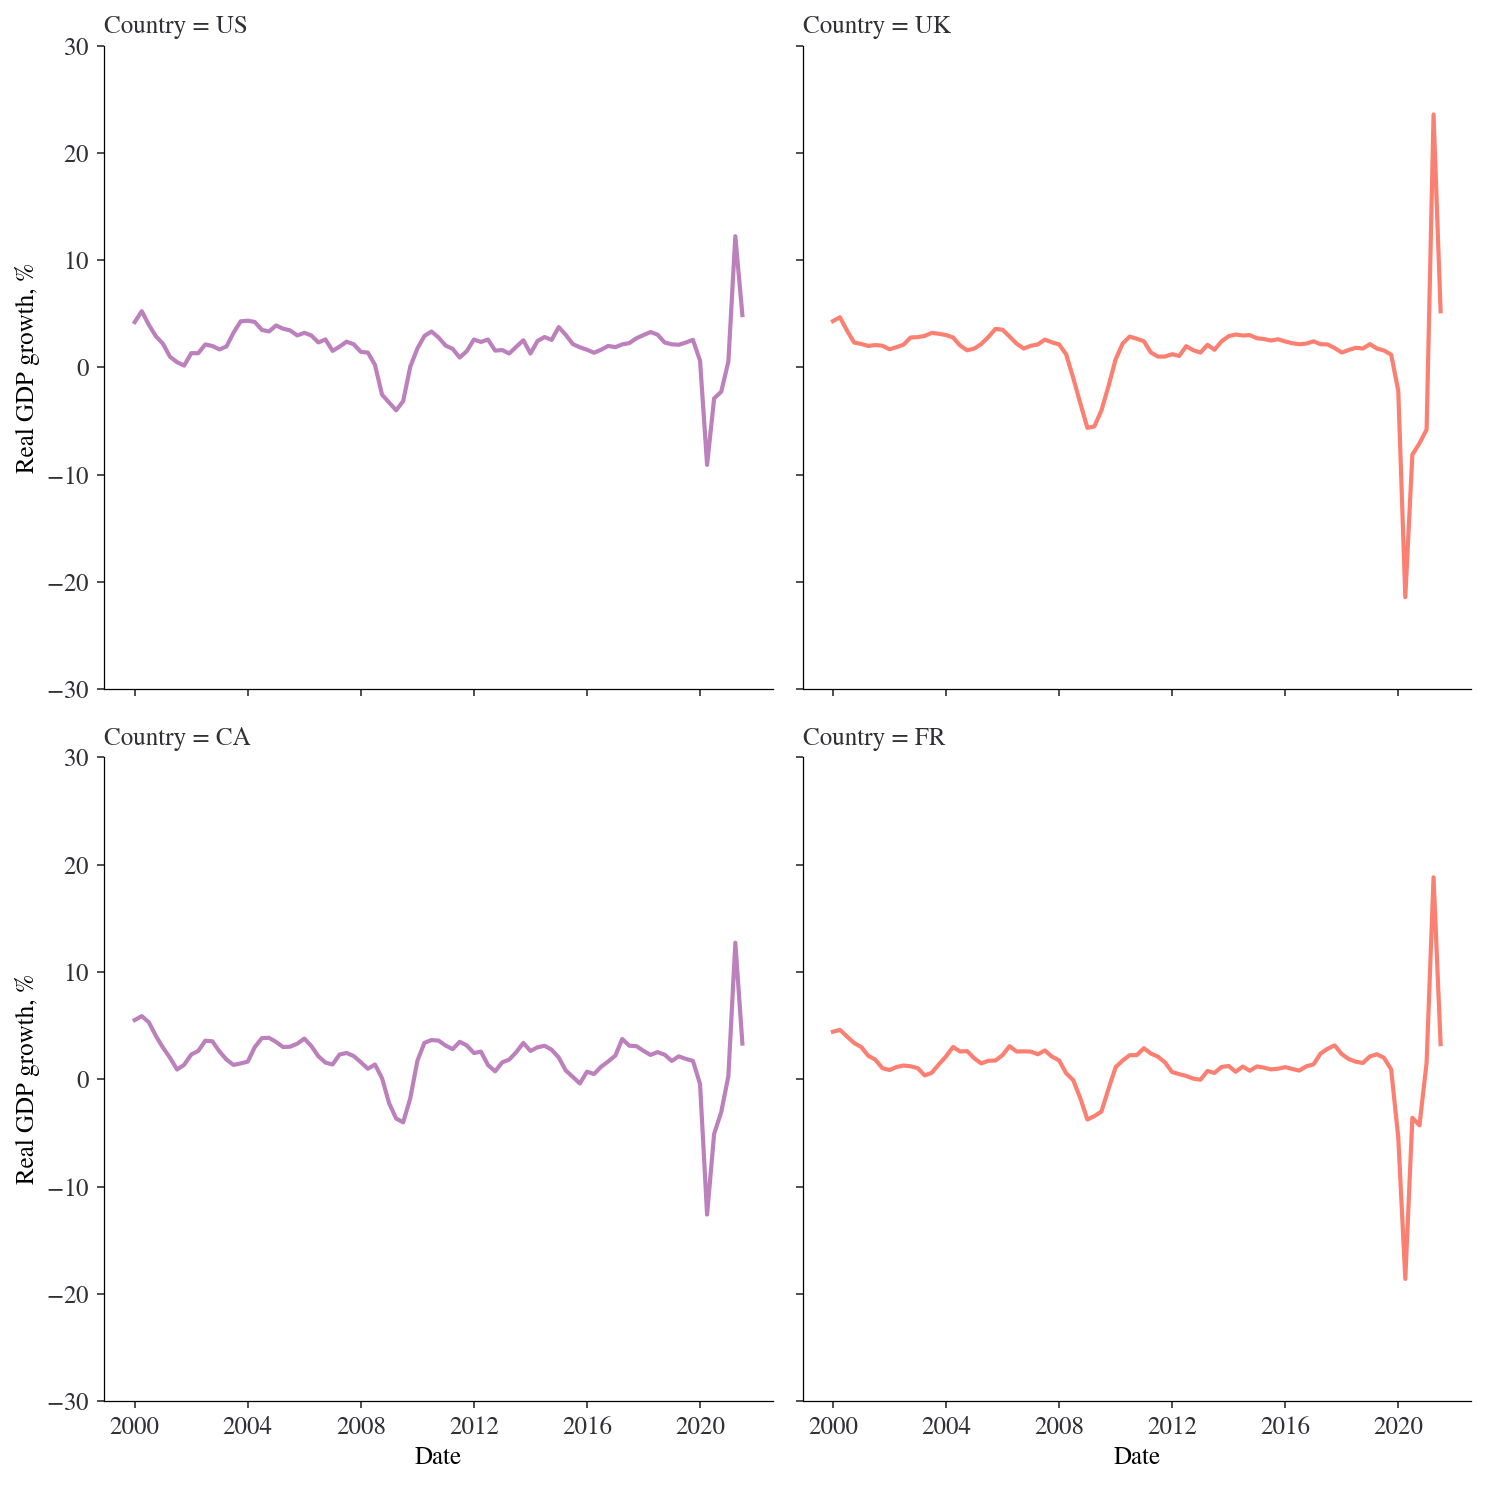

In [24]:
sns.relplot(
    data=tidy_df,
    x="Date",
    y="Real GDP growth, %",
    hue="Region",
    col="Country",
    col_wrap=2,
    kind="line",
    legend=False,
);

As you can see, we now have two colours: one for each region.

Let's see some of the other useful shortcuts that **seaborn** provides over the top of **matplotlib**. First, correlation heatmaps:


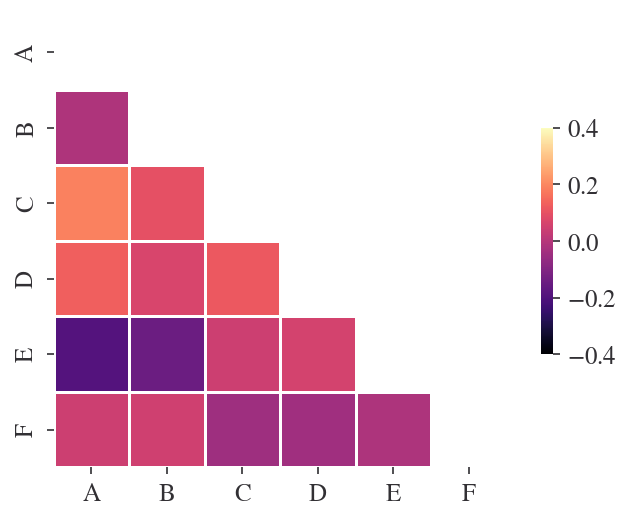

In [25]:
# Generate data and create corr mat
d = pd.DataFrame(
    data=np.random.normal(size=(100, 6)), columns=["A", "B", "C", "D", "E", "F"]
)
corr = d.corr()

# Generate a mask to cover the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap="magma",
    vmin=-0.4,
    vmax=0.4,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
);

**seaborn** also offers convenience functions for (continuous) heatmaps, kernel density estimates, and marginal plots:


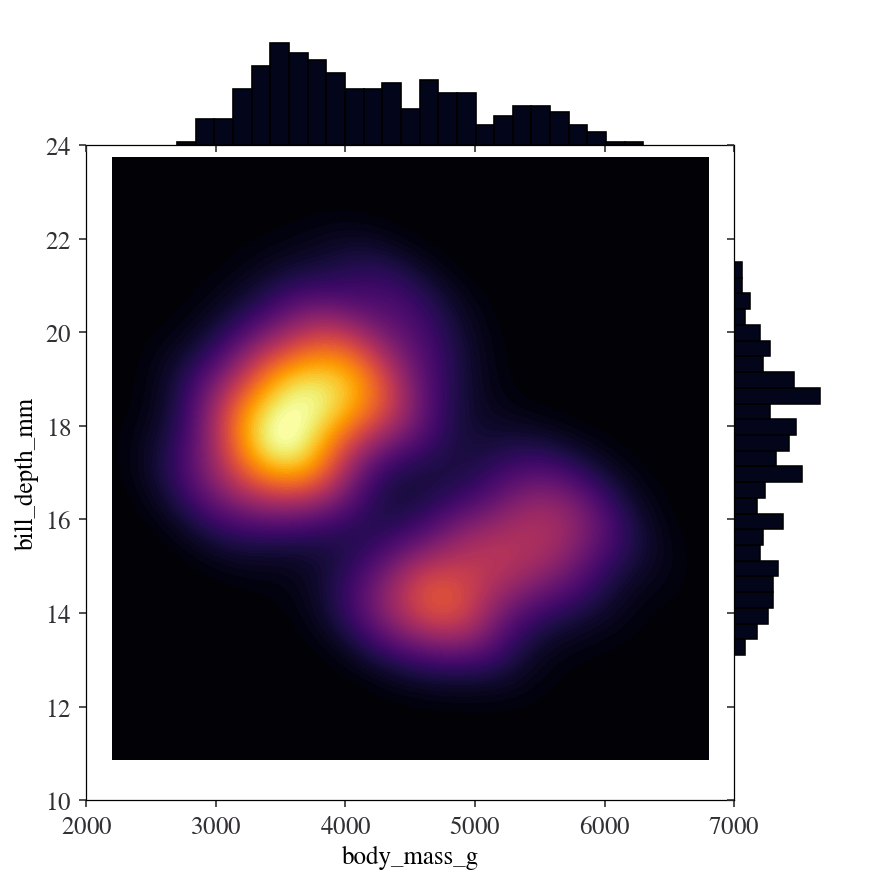

In [26]:
df = sns.load_dataset("penguins")

g = sns.JointGrid(data=df, x="body_mass_g", y="bill_depth_mm", space=0)
g.plot_joint(
    sns.kdeplot,
    fill=True,
    clip=((2200, 6800), (10, 25)),
    thresh=0,
    levels=100,
    cmap="inferno",
)
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25);

And plotting simple linear models according to a category:

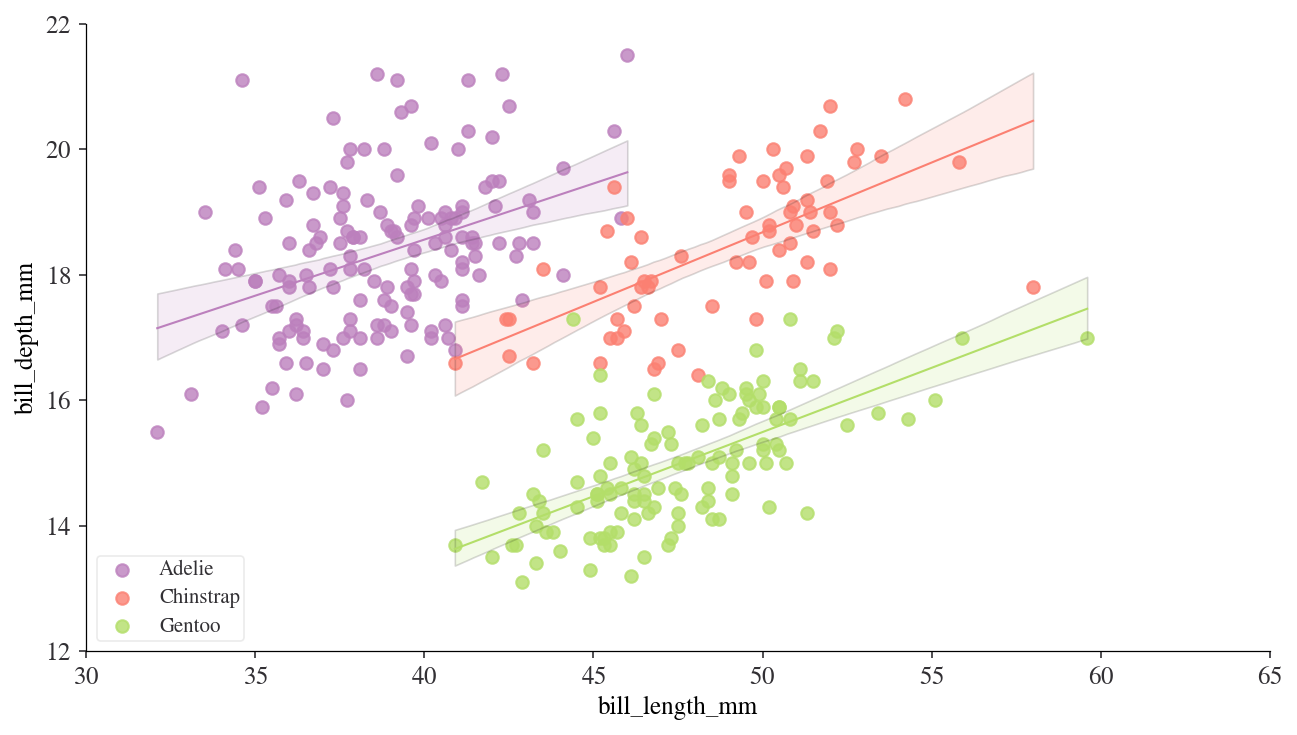

In [27]:
g = sns.lmplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    legend=False,
    line_kws={"lw": 1.0},
    height=5,
    aspect=1.75,
)
plt.legend(loc="lower left", frameon=True);

And, finally, violin plots:

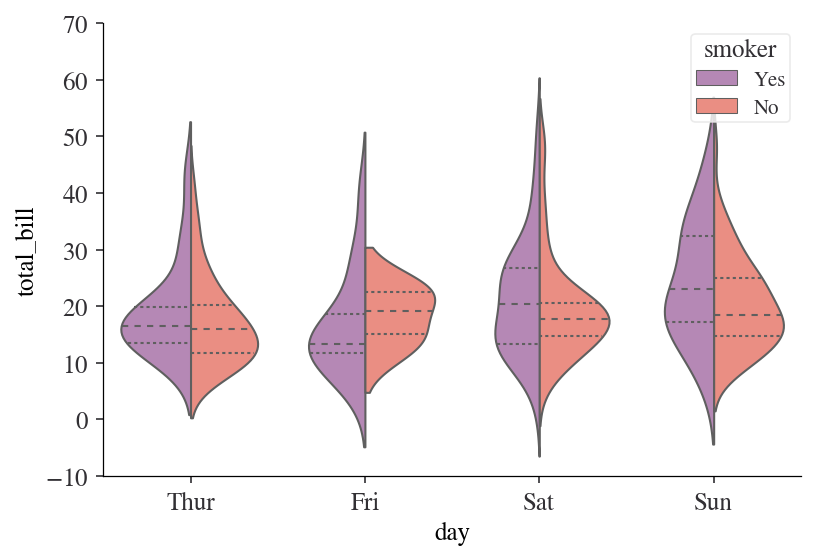

In [28]:
tips = sns.load_dataset("tips")
sns.violinplot(
    data=tips,
    x="day",
    y="total_bill",
    hue="smoker",
    split=True,
    inner="quart",
    linewidth=1,
);

### Plotnine

[**plotnine**](https://plotnine.readthedocs.io/en/stable/) is, like **seaborn**, a declarative library. Unlike **seaborn**, it adopts a 'grammar of graphics' approach inspired by the book 'The Grammar of Graphics' by Leland Wilkinson. **plotnine** is heavily inspired by the API of the popular **ggplot2** plotting package in the statistical programming language R. The point behind the grammar of graphics approach is that users can compose plots by explicitly mapping data to the various elements that make up the plot. It is a particularly effective approach for a whole slew of standard plots created from tidy data.

Before playing with **plotnine** though, I found that my preferred settings for **maplotlib** made the (very sensible) defaults for **plotnine** go awry, particularly for facet plots, so I'm going to switch back to the matplotlib defaults:


In [29]:
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)

Let's take a look at how to do a simple scatter plot, like we saw for **matplotlib**, in **plotnine**. We'll use the *mtcars* dataset.

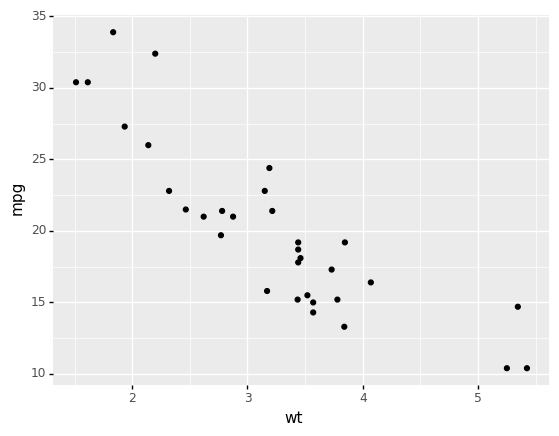

<ggplot: (8788168486672)>

In [30]:
from plotnine import ggplot, geom_point, aes
from plotnine.data import mtcars

(ggplot(mtcars, aes("wt", "mpg")) + geom_point())

Here, `ggplot` is the organising framework for creating a plot and `mtcars` is a dataframe with the data in that we'd like to plot. `aes` stands for aesthetic mapping and it tells **plotnine** which columns of the dataframe to treat as the x and y axis (in that order). Finally, `geom_point` tells **plotnine** to add scatter points to the plot.

If we want to add colour, we pass a colour keyword argument to `aes` like so (with 'factor' meaning treat the variable like it's a categorical):


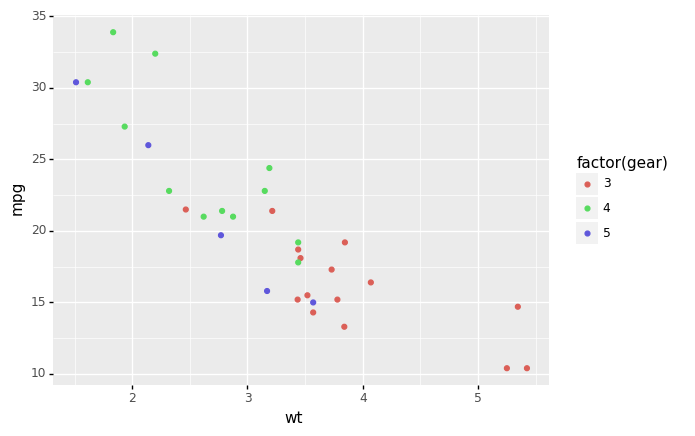

<ggplot: (8788116487530)>

In [31]:
(ggplot(mtcars, aes("wt", "mpg", color="factor(gear)")) + geom_point())

One of the nice aspects of the grammar of graphics approach, perhaps its best feature, is that switching to other types of 'geom' (aka chart type) is as easy as calling the same code but with a different 'geom' switched in. Note that, because we only imported one element at a time from **plotnine** we do need to explicitly import any other 'geoms' that we'd like to use, as in the next example below. But we *could* have just imported everything from **plotnine** instead using `from plotnine import *`.

The next example shows how easy it is to switch between 'geoms'.


/Users/arthurturrell/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


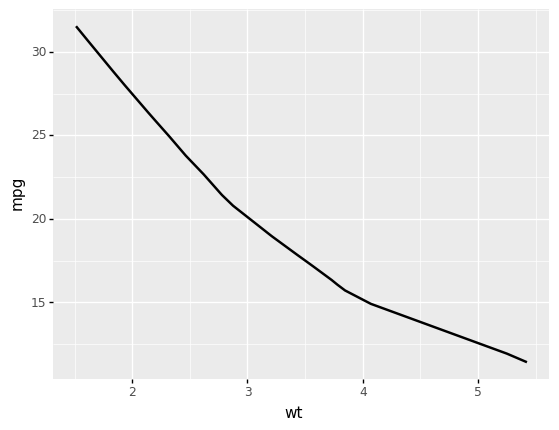

<ggplot: (8788116472772)>

In [32]:
from plotnine import geom_smooth

(ggplot(mtcars, aes("wt", "mpg")) + geom_smooth())

Furthermore, we can add *multiple* geoms to the same chart by layering them within the same call to the `ggplot` function:

/Users/arthurturrell/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


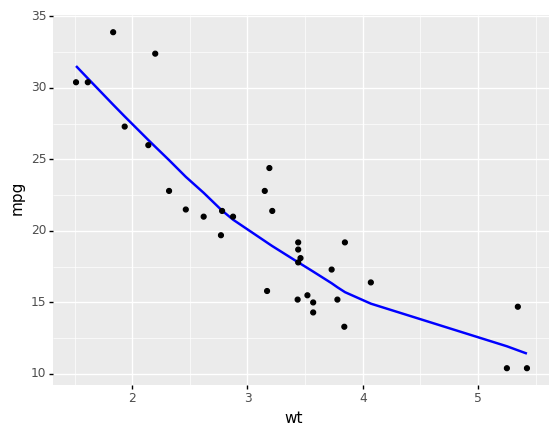

<ggplot: (8788233838574)>

In [33]:
(ggplot(mtcars, aes("wt", "mpg")) + geom_smooth(color="blue") + geom_point())

Just like **seaborn** and **matplotlib**, we can create facet plots too--but this time they're just a variation on the same underlying call to `ggplot`. Let's see that same example of GDP by country rendered with **plotnine**: 

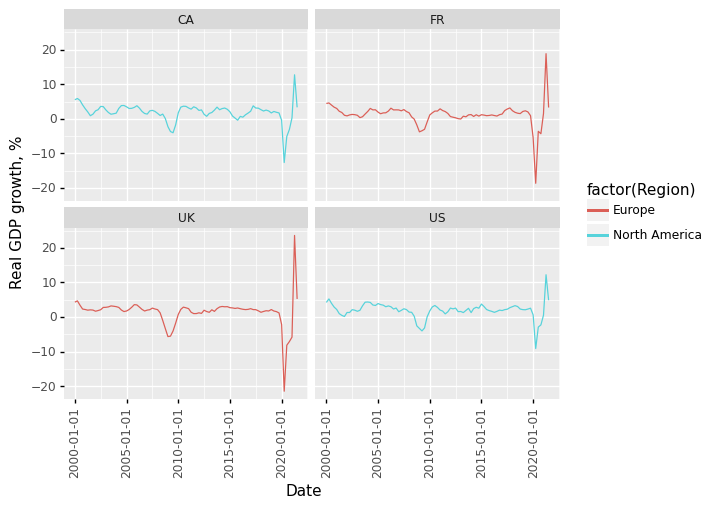

<ggplot: (8788116517765)>

In [34]:
from plotnine import geom_line, facet_wrap, theme, element_text

(
    ggplot(tidy_df, aes(x="Date", y="Real GDP growth, %", color="factor(Region)"))
    + geom_line()
    + facet_wrap("Country", nrow=2)
    + theme(axis_text_x=element_text(rotation=90))
)

**plotnine** can do many of the same types of charts as **seaborn**; let's see some similar examples:

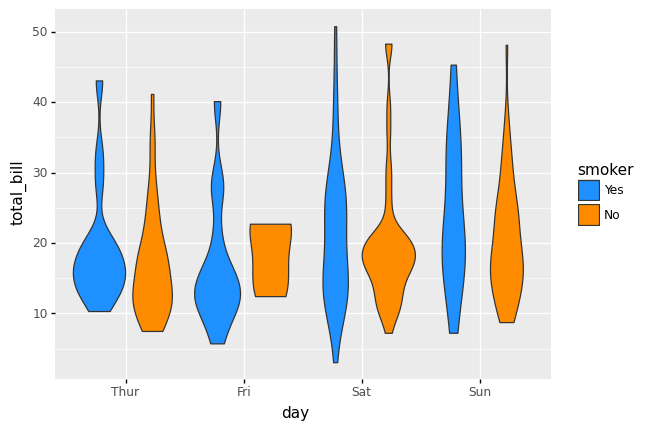

<ggplot: (8788149492140)>

In [35]:
from plotnine import geom_violin, scale_fill_manual

(
    ggplot(tips, aes("day", "total_bill", fill="smoker"))
    + geom_violin(tips)
    + scale_fill_manual(values=["dodgerblue", "darkorange"])
)

/Users/arthurturrell/opt/anaconda3/envs/codeforecon/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


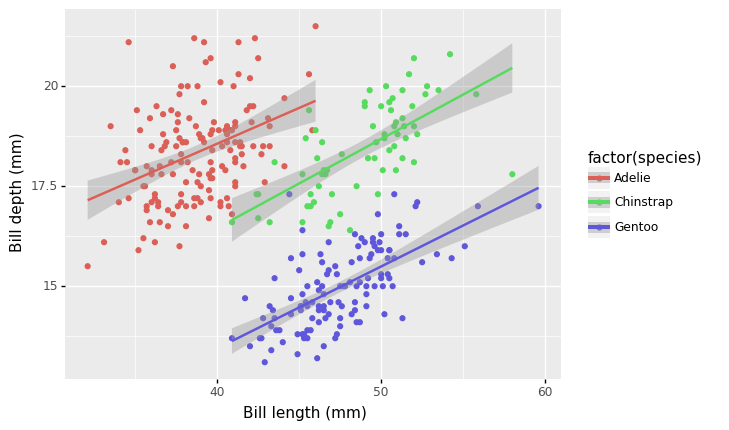

<ggplot: (8788216852761)>

In [36]:
from plotnine import labs

(
    ggplot(df, aes(x="bill_length_mm", y="bill_depth_mm", color="factor(species)"))
    + geom_point()
    + geom_smooth(method="lm")
    + labs(x="Bill length (mm)", y="Bill depth (mm)")
)

Finally, an example of great practical use during exploratory analysis, the kernel density plot:

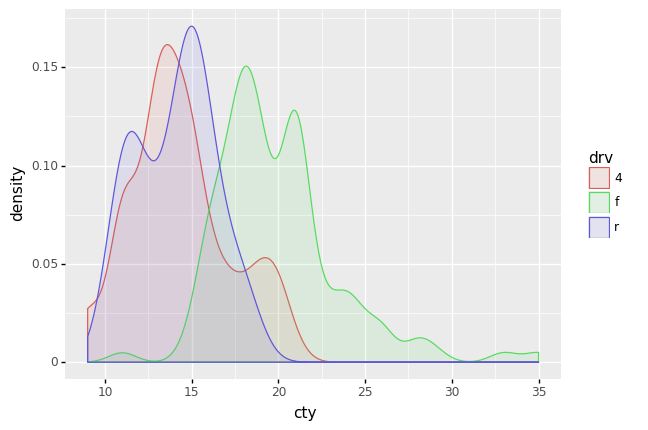

<ggplot: (8788182994698)>

In [37]:
from plotnine import geom_density
from plotnine.data import mpg

(ggplot(mpg, aes(x="cty", color="drv", fill="drv")) + geom_density(alpha=0.1))

### Altair

[**Altair**](https://altair-viz.github.io/) is similar to **plotnine** and **seaborn**, in that it's declarative, but it's very dissimilar in its look and feel. It isn't based on **matplotlib** and it's really more suited to displaying graphics on the web than anything else. Under the hood, it uses powerful javascript visualisation libraries. Because you're unlikely to use it in a paper, we won't give it quite the same amount of time or consideration as the other libraries.

A note of caution about **altair**: you shouldn't use it for very large datasets (see the guidance [here](https://altair-viz.github.io/user_guide/faq.html#altair-faq-large-notebook)--there is a way around it) and, last time I tried, charts couldn't easily be exported to a PDF friendly format. It's really geared around web visualisation, and very beautiful web vis at that!

The first thing to understand about **altair** is that, in a similar way to **plotnine**, the creation of a chart is always the same and it's only the specification of the type of chart that happens differently. Here's a by now familiar scatterplot example:

In [38]:
import altair as alt
from vega_datasets import data

cars = data.cars()

alt.Chart(cars).mark_circle(size=60).encode(
    x="Horsepower", y="Miles_per_Gallon", color="Origin", tooltip=["Name"]
).interactive()

alt.Chart(...)

There's a lot to unpack here! The very basic elements of the chart come from calling

```python
alt.Chart(cars).mark_circle().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
)
```

as this asks for a chart using the (tidy) mtcars dataframe with circles that are coloured by the variable 'gear' treated as an ordinal (aka a category or factor) using `color=gear:O`. I had to specify that this should be  There are some extras. I added bigger circles and interactivity so that you can i) move the chart around as you like and ii) if you hover over any of the points, you will see the 'name' variable for that entry displayed. The latter is achieved via the tooltip keyword argument.

As with ggplot, we can add multiple elements to a single plot. In this case, **altair** uses a clever property of Python called overloading to 'overload' the addition operator so that chart1 + chart2 creates a combined chart of both:

In [39]:
points = (
    alt.Chart(cars)
    .mark_point()
    .encode(x="Horsepower", y="Miles_per_Gallon", tooltip=["Name"])
)

line = points.transform_loess("Horsepower", "Miles_per_Gallon").mark_line(color="black")

(points + line).interactive()

alt.LayerChart(...)

They have also overloaded other symbols so that charts can be shown in relative positions:

In [40]:
points = (
    alt.Chart(cars)
    .mark_circle(size=60)
    .encode(x="Horsepower", y="Miles_per_Gallon", color="Origin", tooltip=["Name"])
)

hist = (
    alt.Chart(cars)
    .mark_bar()
    .encode(
        x="count()",
        y=alt.Y("Miles_per_Gallon:Q", bin=alt.Bin(maxbins=30)),
        color="Origin:N",
    )
)

points | hist

alt.HConcatChart(...)

Note that `:N` tells **altair** to treat the variable preceeding the colon as a nominal value, ditto `:Q` for quantitative values. Most of the time **altair** will guess what you need, but it's easy to specify it if you need to. More complex combinations of chart arrangements may be achieved with the `alt.hconcat` and `alt.vconcat` functions.

Let's now return to some of our favourite examples and see how they look in **altair**.

In [41]:
alt.Chart(tidy_df).mark_line().encode(
    x="Date:T",
    y="Real GDP growth, %",
    color="Region:N",
    facet=alt.Facet("Country:N", columns=2),
)

alt.Chart(...)

In [42]:
alt.Chart(mpg).transform_density(
    density="cty", as_=["cty", "density"], groupby=["drv"]
).mark_area(fillOpacity=0.8).encode(
    x="cty:Q",
    y="density:Q",
    color="drv:N",
)

alt.Chart(...)

In [43]:
chart = (
    alt.Chart(df)
    .mark_point()
    .encode(x="bill_length_mm", y="bill_depth_mm", color="species:N")
)

(
    chart
    + chart.transform_regression("bill_length_mm", "bill_depth_mm", groupby=["species"])
    .mark_line()
    .interactive()
)

alt.LayerChart(...)

In [44]:
alt.Chart(tips).transform_density(
    "total_bill", as_=["total_bill", "density"], groupby=["day"]
).mark_area(orient="horizontal").encode(
    y="total_bill:Q",
    color="day:N",
    x=alt.X(
        "density:Q",
        stack="center",
        impute=None,
        title=None,
        axis=alt.Axis(labels=False, values=[0], grid=False, ticks=True),
    ),
    column=alt.Column(
        "day:N",
        header=alt.Header(
            titleOrient="bottom",
            labelOrient="bottom",
            labelPadding=0,
        ),
    ),
).properties(
    width=100
).configure_facet(
    spacing=0
).configure_view(
    stroke=None
)

alt.Chart(...)

I'm not an expert at **altair**, and there are many more (and, frankly, better) examples in their [gallery](https://altair-viz.github.io/gallery/index.html). It's a really rich tool though and, in expert hands, could be used to create the kind of visualisations that you might see in newspaper.

But let's just see what someone who *does* know what they're doing can achieve using it using one of their examples (and how poorly South London is served by tube lines!):

In [45]:
boroughs = alt.topo_feature(data.londonBoroughs.url, "boroughs")
tubelines = alt.topo_feature(data.londonTubeLines.url, "line")
centroids = data.londonCentroids.url

background = (
    alt.Chart(boroughs)
    .mark_geoshape(stroke="white", strokeWidth=2)
    .encode(
        color=alt.value("#eee"),
    )
    .properties(width=700, height=500)
)

labels = (
    alt.Chart(centroids)
    .mark_text()
    .encode(
        longitude="cx:Q",
        latitude="cy:Q",
        text="bLabel:N",
        size=alt.value(8),
        opacity=alt.value(0.6),
    )
    .transform_calculate(
        "bLabel",
        "indexof (datum.name,' ') > 0  ? substring(datum.name,0,indexof(datum.name, ' ')) : datum.name",
    )
)

line_scale = alt.Scale(
    domain=[
        "Bakerloo",
        "Central",
        "Circle",
        "District",
        "DLR",
        "Hammersmith & City",
        "Jubilee",
        "Metropolitan",
        "Northern",
        "Piccadilly",
        "Victoria",
        "Waterloo & City",
    ],
    range=[
        "rgb(137,78,36)",
        "rgb(220,36,30)",
        "rgb(255,206,0)",
        "rgb(1,114,41)",
        "rgb(0,175,173)",
        "rgb(215,153,175)",
        "rgb(106,114,120)",
        "rgb(114,17,84)",
        "rgb(0,0,0)",
        "rgb(0,24,168)",
        "rgb(0,160,226)",
        "rgb(106,187,170)",
    ],
)

lines = (
    alt.Chart(tubelines)
    .mark_geoshape(filled=False, strokeWidth=2)
    .encode(
        alt.Color(
            "id:N", legend=alt.Legend(title=None, orient="bottom-right", offset=0)
        )
    )
)

background + labels + lines

alt.LayerChart(...)

### Other useful data visualisation tools

#### Honourable mentions

There are tons of data visualisation libraries in Python and it didn't seem sensible to feature them all in great detail, but here are a few more that may be worth looking into depending on what you need.

[**proplot**](https://proplot.readthedocs.io/en/latest/index.html) aims to be "A lightweight matplotlib wrapper for making beautiful, publication-quality graphics", though the style is more similar to how people might make plots in the hard sciences rather than the social sciences. The point of this library is to take some of the verbosity out of **matplotlib**:

> ProPlot’s core mission is to provide a smoother plotting experience for matplotlib’s heaviest users. We accomplish this by expanding upon the object-oriented matplotlib API. ProPlot makes changes that would be hard to justify or difficult to incorporate into matplotlib itself, owing to differing design choices and backwards compatibility considerations.

There are a lot of nice features here that aim to make life easier (or at least a lot more concise) when you are mostly using **matplotlib**, you can check out the **proplot** documentation to find out more.  **proplot**.

As to other libraries, here's a quick run down:

- if you're using very big data in machine learning models, it might be worth looking at Facebook's [**hiplot**](https://github.com/facebookresearch/hiplot)
- [Seaborn image](https://seaborn-image.readthedocs.io/en/latest/) does for image data what **seaborn** does for numerical and categorical data
- [Lit](https://pair-code.github.io/lit/) provides an open-source platform for visualization and understanding of NLP models (very impressive)
- [Wordcloud](https://github.com/amueller/word_cloud) does exactly what you'd expect (but use word clouds *very* sparingly!)
- [plotly express](https://plotly.com/python/plotly-express/) is another declarative-leaning library that's suited to web apps and dashboards.
- [VisPy](http://vispy.org) for very large datasets plotted with WebGL and GPU acceleration.
- [PyQtGraph](http://www.pyqtgraph.org/), a pure-Python graphics library for PyQt5/PySide2 and intended for use in (heavy) mathematics / scientific / engineering applications (not very user friendly).
- [bokeh](https://docs.bokeh.org/en/latest/index.html#) offers interactive web plotting in Python.
- [HoloViews](https://holoviews.org/), a library designed to make data analysis and visualization seamless and simple with very concise commands (builds on bokeh and matplotlib).
- [YellowBrick](https://www.scikit-yb.org/en/latest/) for visualisations of machine learning models and metrics.
- [facets](https://pair-code.github.io/facets/) for quickly visualising machine learning features (aka regressors). Also useful for exploratory data analysis.
- [chartify](https://github.com/spotify/chartify), Spotify's quick plotting library for data scientists.
- [scikit-plot](https://github.com/reiinakano/scikit-plot) offers plotting tools designed around Python's wildy popular scikit-learn machine learning library.
- [themepy](https://github.com/petermckeeverPerform/themepy) is an open source theme selector / creator and aesthetic manager for Matplotlib.
- [scienceplots](https://github.com/garrettj403/SciencePlots) provides scientific plotting styles--some associated with specific journals--for Matplotlib.
- [colour](https://www.colour-science.org/) provides professional level colour tools for Python.
- [palettable](https://jiffyclub.github.io/palettable/) has extra colour palettes that work well with Matplotlib.
- [colorcet](https://colorcet.holoviz.org/) is a collection of perceptually uniform colourmaps.
- [missingno](https://github.com/ResidentMario/missingno) for visualization of missing data.
- [bashplotlib](https://github.com/glamp/bashplotlib), for when you want to make visualisations directly from the command line (I don't imagine this will be very often, but always good to know the option is there!)

You can see an overview of all Python plotting tools at [PyViz](https://pyviz.org/tools.html).


## Review

If you know:

- ✅ a little bit about how to use data visualisation;
- ✅ what some of the most popular libraries for data vis are; and
- ✅ how to make simple plots in the most popular data vis libraries,

then you are well on your way to being a whizz with data vis!